In [17]:
from settings import *

In [18]:
qubits = TriangularLayoutA(m=1, cutoff=1, distance=0.9)
operations = [("rz", "A"), ("rx", "A"), ("rz", "A"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=5)

<Axes: title={'center': 'Qubit layout'}>

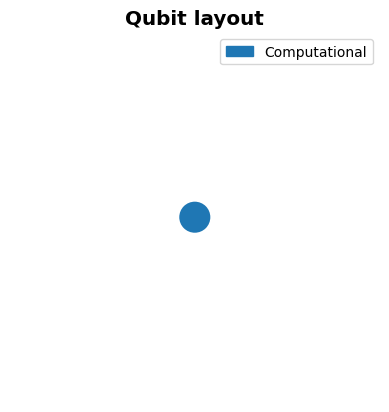

In [19]:
qubits.show_layout()

In [20]:
theta_opt, errors, thetas = optimize(circuit, training_data_short, max_count=100)

theta_opt = np.save("ham_theta_opt.npy", theta_opt)
thetas = np.save("ham_thetas.npy", thetas)
errors = np.save("ham_errors.npy", errors)

optimizer (optimization indices): setting seed=47870
Iteration: 0 
            Current gradient term: [ 0.09719408  0.00219098  0.04013828  0.          0.04013828  0.0111806
  0.09655815  0.          0.09655815 -0.00635542  0.04137874  0.
  0.04137874  0.0195391   0.0947264   0.          0.0947264  -0.01443645
  0.04378213  0.        ] 
            Current error: 0.26745590291952387 
            Current sigma values: (1, 0, 10)
Iteration: 10 
            Current gradient term: [ 1.86754572e-04  7.23118880e-05 -2.44655567e-05  0.00000000e+00
 -2.44655567e-05  7.47012185e-05  1.76781557e-04  0.00000000e+00
  1.76781557e-04 -9.29719534e-05  4.22825125e-05  0.00000000e+00
  4.22825125e-05  1.88025657e-04  6.08368525e-05  0.00000000e+00
  6.08368525e-05 -6.58942560e-05  1.87182407e-04  0.00000000e+00] 
            Current error: 0.07743826039023168 
            Current sigma values: (2, 0, 1.25)
Iteration: 20 
            Current gradient term: [ 1.01024607e-07 -1.52961865e-08  1.49609415e-

In [21]:
theta_opt = np.load("ham_theta_opt.npy")
thetas = np.load("ham_thetas.npy")
errors = np.load("ham_errors.npy")

In [22]:
theta_opt

array([1.0471777 , 1.590643  , 1.19408455, 1.5       , 1.19408455,
       1.37102586, 1.09831437, 1.5       , 1.09831437, 1.47136281,
       1.18094937, 1.5       , 1.18094937, 1.49957726, 1.06049024,
       1.5       , 1.06049024, 1.4259989 , 1.30781781, 1.5       ])

rho_rand_haar: seed=37102

<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

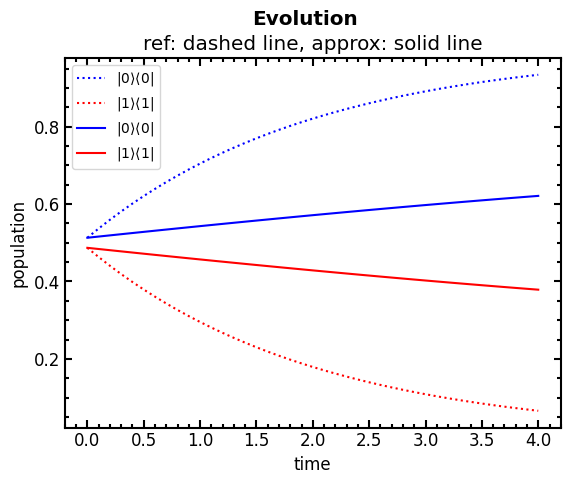

In [23]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.1, N=40, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

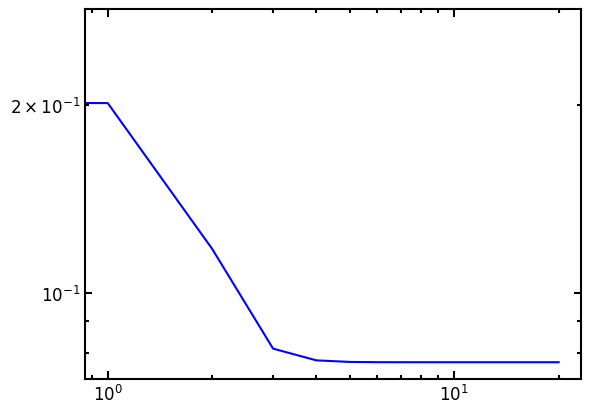

In [24]:
plt.loglog(errors)